In [42]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error

RANDOM_STATE = 42

X = np.load('NonNumeric_feature_dataset/nonnumeric6_labelen_train.npy')
# X = np.delete(X, 2, axis=1) # 去掉路名
# X = np.delete(X, 1, axis=1) # 去掉鄉鎮市區
# X = X[:, :2] # 只用縣市+鄉鎮市區
X = X[:, 0].reshape(-1, 1) # 只用縣市
print(X.shape)
y = np.load('Numeric_feature_dataset/target_train.npy').reshape(-1, )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

gbr = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.001, verbose=1, n_iter_no_change=500).fit(X_train, y_train)
train_pred = gbr.predict(X_train)
print(mean_absolute_percentage_error(y_train, train_pred)*100)
test_pred = gbr.predict(X_test)
print(mean_absolute_percentage_error(y_test, test_pred)*100)
print(gbr.score(X_train, y_train))
print(gbr.score(X_test, y_test))

(11751, 1)
      Iter       Train Loss   Remaining Time 
         1           1.0016           14.95s
         2           1.0016           12.46s
         3           1.0016           11.62s
         4           1.0016           12.49s
         5           1.0015           11.98s
         6           1.0015           12.45s
         7           1.0015           13.53s
         8           1.0015           13.08s
         9           1.0014           12.18s
        10           1.0014           11.94s
        20           1.0011           11.67s
        30           1.0009           12.06s
        40           1.0006           12.49s
        50           1.0004           12.05s
        60           1.0001           11.25s
        70           0.9999           10.54s
        80           0.9996           10.49s
        90           0.9994           10.17s
       100           0.9992            9.97s
       200           0.9972            8.21s
       300           0.9956            7.48

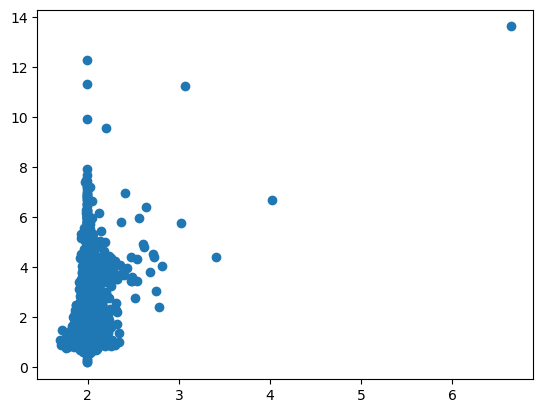

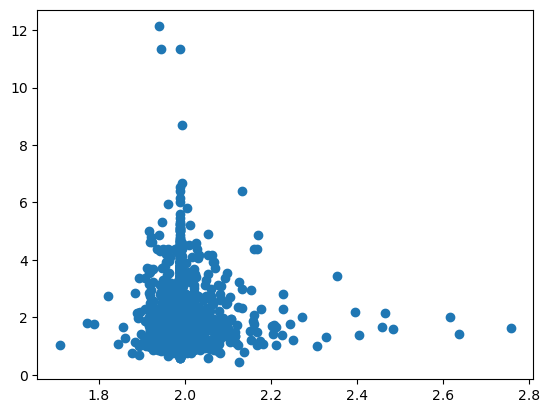

In [35]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(train_pred, y_train, 'o')
plt.show()

plt.figure()
plt.plot(test_pred, y_test, 'o')
plt.show()